<div style="font-size: 30pt; font-family: cursive; color: #FA6E4F"> 
    <b> <center> Visualizing QS World University Rankings from 2017 to 2022 </center> </b>
</div>

<div style="text-align: center;">
<img src="https://www.qs.com/wp-content/uploads/2020/06/WUR-2021.jpg" width="260" height="200">
</div>

<div style="font-size: 13pt; font-family: verdana; color: #08415C"> 
    QS World University Rankings is an annual publication of global university rankings by Quacquarelli Symonds. The QS ranking receives approval from the International Ranking Expert Group (IREG), and is viewed as one of the three most-widely read university rankings in the world, along with Academic Ranking of World Universities and Times Higher Education World University Rankings. Quacquarelli Symonds (QS) is a UK company specialising in the analysis of higher education institutions around the world. In December 2003, Richard Lambert's review of university-industry collaboration in Britain for HM Treasury, the finance ministry of the United Kingdom recommended the need for world university rankings which Lambert said would help the UK to gauge the global standing of its universities. So, the first issue of QS World Rankings was released in 2004 in partnership with Times Higher Education (THE) as <i style="color: #FB8E7E">Times Higher Education - QS World University Rankings.</i> In 2009, <i>THE</i> split with QS and went ahead to publish its own version of rankings. QS has been publishing its university rankings in partnership with Elsevier.
</div>
<br/>
<h2 style="font-family: verdana; color: #FA6E4F"> Methodology </h2>
<div style="font-size: 13pt; font-family: verdana; color: #08415C"> 
    QS designed its rankings to assess performance according to what it believes to be key aspects of a university's mission: teaching, research, nurturing employability, and internationalisation. The methodological framework it follows assess universities based on six metrics,
    <ul>
        <li> Academic Reputation (40%)</li>
        <li> Employer Reputation (10%)</li>
        <li> Faculty/Student Ratio (20%)</li>    
        <li> Citations per faculty (20%)</li>
        <li> International Faculty Ratio (5%)</li>
        <li> International Student Ratio (5%)</li>
    </ul>
    More information about the methodology can be found <a href="https://www.topuniversities.com/qs-world-university-rankings/methodology">here</a>.
</div>


<div class='alert alert-block alert-warning' style="font-size: 20pt; font-family: cursive; color: #08415C"> 
    <b> <center> About Data 📊🔎 </center> </b>
</div>

<div style="font-size: 13pt; font-family: verdana; color: #08415C"> 
    The dataset was obtained by scraping the <a href="https://www.topuniversities.com/university-rankings/world-university-rankings/2022">QS World University Rankings website</a>  with Python and Selenium.
</div>
<h2 style="font-family: verdana; color: #FA6E4F"> Feature Description </h2>
<div style="font-size: 13pt; font-family: verdana; color: #08415C"> 
    The dataset has a total of 15 columns.
    <ul>
        <li>university - name of the university</li>
        <li>year - year of ranking</li>
        <li>rank_display - rank given to the university</li>    
        <li>score - score of the university based on the six key metrics mentioned above</li>
        <li>link - link to the university profile page on QS website</li>
        <li>country - country in which the university is located</li>
        <li>city - city in which the university is located</li>
        <li>region - continent in which the university is located</li>
        <li>logo - link to the logo of the university</li>
        <li>type - type of university (public or private)</li>
        <li>research_output - quality of research at the university</li>
        <li>student_faculty_ratio - number of students assigned to per faculty</li>
        <li>international_students - number of international students enrolled at the university</li>
        <li>size - size of the university in terms of area</li>
        <li>faculty_count - number of faculty or academic staff at the university</li>
    </ul>
</div>

In [ ]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 13.5 MB/s 
     |████████████████████████████████| 6.3 MB 37.6 MB/s 
     |████████████████████████████████| 16.7 MB 63.2 MB/s 


<div class='alert alert-block alert-warning' style="font-size: 20pt; font-family: cursive; color: #08415C"> 
    <b> <center> Import Libraries 📚 </center> </b>
</div>

In [ ]:
# import necessary libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
plt.rcParams['axes.edgecolor']='#FA6E4F'
plt.rcParams['font.family'] = 'monospace'
import seaborn as sns
import geopandas as gpd
import missingno as msno
import re

import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

<div class='alert alert-block alert-warning' style="font-size: 20pt; font-family: cursive; color: #08415C"> 
    <b> <center> Custom Color Palette 🎨 </center> </b>
</div>

In [ ]:
long_palette = ["#FA6E4F", "#F2CF59", "#FB8E7E", "#C5D7C0", "#8EC9BB", "#F8CA9D", '#F69EAF', '#8F8CBC', '#7C5396', '#EA6382', '#6BEAF3', '#5A9DE2', '#DDAD64', '#EA876B', '#B98174', '#357866', '#625586', '#647B99']
custom_palette1 = sns.color_palette(long_palette)

short_palette = ["#FA6E4F", "#F2CF59", "#FB8E7E", "#C5D7C0", "#8EC9BB", "#F8CA9D"]
custom_palette2 = sns.color_palette(short_palette)

watermelon_colors = ['#84e3c8', '#a8e6cf', '#dcedc1', '#ffd3b6', '#ffaaa5', '#ff8b94', '#ff7480']
custom_palette3 = sns.color_palette(watermelon_colors)

research_palette = ['#FA6E4F','#8EC9BB']

student_faculty_palette = ['#003f5c','#ff6361']

international_palette = ['#ffcf6a','#628d82']

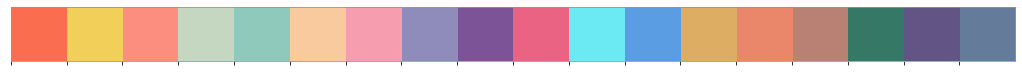

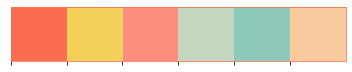

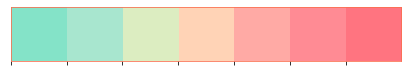

In [ ]:
sns.palplot(sns.color_palette(long_palette))
sns.palplot(sns.color_palette(short_palette))
sns.palplot(sns.color_palette(watermelon_colors))

<div class='alert alert-block alert-warning' style="font-size: 20pt; font-family: cursive; color: #08415C"> 
    <b> <center> Load and Explore data 🕵🏻‍♀️ </center> </b>
</div>

In [ ]:
university_df = pd.read_excel("/content/drive/MyDrive/DAE-PUCP/Docentes - policy paper/Base de datos/data2017_2022.xlsx")

FileNotFoundError: ignored

In [ ]:
university_df.head()

In [ ]:
university_df.shape

In [ ]:
university_df.info()

<div class='alert alert-block alert-warning' style="font-size: 20pt; font-family: cursive; color: #08415C"> 
    <b> <center> Data Cleaning and Preprocessing 🧹🔨 </center> </b>
</div>

<div style="font-size: 13pt; font-family: verdana; color: #08415C"> 
        We can see from the dataset info() method that there are many null values across multiple columns. Let's take a look at the number of null values.
</div>

In [ ]:
pd.DataFrame(university_df.isnull().sum(), columns=['No. of Missing values'])

In [ ]:
missing_percent = round(university_df.isna().mean() * 100, 1)
pd.DataFrame(missing_percent[missing_percent > 0], columns=['% of Missing Values'])

<div style="font-size: 13pt; font-family: verdana; color: #08415C"> 
        Before handling the null values, let's see if there is any correlation between the missing values. I have used the <i style="color: #FB8E7E">missingno</i> package. It's a simple python package that can be used for missing data visualization. Visualizing correlation between missing values can give better insights about the missingness of data. Learn more about missingness types <a href="https://towardsdev.com/how-to-identify-missingness-types-with-missingno-61cfe0449ad9">here.</a>
</div>

In [ ]:
cmap = ListedColormap(custom_palette3, name='cmap1')
msno.heatmap(university_df, cmap=cmap, figsize=(13, 6), fontsize=14);

<div style="font-size: 13pt; font-family: verdana; color: #08415C"> 
    The correlation heatmap includes only the columns with missing values. The higher the correlation, the higher the missing values in one column are dependent on the missing values with another column. We can see 'faculty_count' has significant correlation with 'student_faculty_ratio' and 'international_students'. Other columns have little or no significant correlation.
</div>

<div style="font-size: 13pt; font-family: verdana; color: #08415C"> 
    Since multiple columns have missing values, let's drop rows that have more than 4 missing values because we can't work with a university that's missing a lot of its attributes.
</div>

In [ ]:
print(len(university_df[university_df.isnull().sum(axis=1) > 4]))
drop_index = university_df[university_df.isnull().sum(axis=1) > 4].index.tolist()
university_df.drop(drop_index, inplace=True)
print('Rows which have more than 4 null values have been dropped!')

<div style="font-size: 13pt; font-family: verdana; color: #08415C"> 
    Let's drop 'link' and 'logo' column as they are hyperlinks. Although 'score' column can be very useful for analysis, its missing nearly 56% values. When I looked for these values on the QS website, I could see they have given a score only for the top 500 universities although 1000+ universities have been ranked. So, I'm ignoring this column as well.
</div>

In [ ]:
university_df.drop(['link', 'logo', 'score'], axis=1, inplace=True)

<div style="font-size: 13pt; font-family: verdana; color: #08415C"> 
    Converting the 'international_students', 'faculty_count' and 'rank_display' column to numerical by removing all the special characters in them. 
</div>

In [ ]:
university_df['research_output'] = university_df['research_output'].replace('Very high', 'Very High')
university_df['international_students'] = university_df['international_students'].apply(lambda x: float(str(x).replace(',','')))
university_df['faculty_count'] = university_df['faculty_count'].apply(lambda x: float(str(x).replace(',','')))
university_df['rank_display'] = university_df['rank_display'].apply(lambda x: float(re.sub(r'\W+', '', str(x))))

<div class='alert alert-block alert-warning' style="font-size: 20pt; font-family: cursive; color: #08415C"> 
    <b> <center> Visualizing universities by year and type </center> </b>
</div>

In [ ]:
year_df = university_df['year'].value_counts().sort_values()
fig, ax = plt.subplots(figsize=(10,4), dpi=90)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(bottom=False)
ax.get_yaxis().set_visible(False)

sns.countplot(data=university_df, x='year', palette=custom_palette1);

# add values on top of each bar
ax.bar_label(ax.containers[0])

ax.set_xlabel('Year', fontsize=13, color = '#ff4800');
fig.suptitle('Number of universities ranked over the years', fontsize=15, color = '#ff4800');

<div style="font-size: 13pt; font-family: verdana; color: #08415C"> 
    With each year, more and more universities are considered for the rankings and 2022 has the highest number of universities.
</div>

In [ ]:
type_df = university_df['type'].value_counts()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

pie_bar_colors = ['#FB8E7E','#8EC9BB']
explode = [0,0.1]
ax1.pie(university_df['type'].value_counts().values, labels = university_df['type'].value_counts().index, explode=explode, colors=pie_bar_colors, autopct='%1.1f%%') 
ax1.axis('equal')

ax2.bar(university_df['type'].value_counts().index, university_df['type'].value_counts().values, color=pie_bar_colors) 
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.tick_params(axis='both', which='both', labelsize=10, left=False, bottom=False)
ax2.get_yaxis().set_visible(False)
plt.title("University Types", fontsize=15, color = '#ff4800');

ax2.bar_label(ax2.containers[0])

fig.tight_layout()
fig.subplots_adjust(wspace=0.7)

<div style="font-size: 13pt; font-family: verdana; color: #08415C"> 
    If you do a simple google search, you can find many websites claiming that private universities are better than public universities because they tend to have better rankings. Well, that's not the case here. More than 80% of the universities ranked are public.
</div>

<div class='alert alert-block alert-warning' style="font-size: 20pt; font-family: cursive; color: #08415C"> 
    <b> <center> Distribution of universities across the world 🌏 </center> </b>
</div>

<div style="font-size: 13pt; font-family: verdana; color: #08415C"> 
    Now, let's take a look at the geography of the universities.
</div>

<div class='alert alert-block alert-info' style="font-size: 15pt; font-family: cursive; color: #08415C"> 
    <b> <center> Universities by Continents 🗺</center> </b>
</div>

In [ ]:
university_df['region'] = university_df['region'].apply(lambda x: x.replace('Latin America', 'South America'))
region_sum = pd.DataFrame(university_df['region'].value_counts().reset_index())

# define colors
colors = ['#f8e3ca','#f8d1b4','#f7bf9e','#f6ad88','#f69b72','#f5895c']
cmap = ListedColormap(colors)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), dpi=150, gridspec_kw={'height_ratios': [1, 2]})

# create barplot
ax1.bar(region_sum['index'], region_sum['region'], color=colors[::-1])
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.tick_params(bottom=False)
ax1.get_yaxis().set_visible(False)
ax1.bar_label(ax1.containers[0])

fig.suptitle('Distribution of universities across continents', fontsize=13, color = '#ff4800');

# create worldmap
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
worldmap_df = world.set_index('continent').join(region_sum.set_index('index')).reset_index()
to_be_mapped = 'region'
legend_labels = region_sum['index'].tolist()[::-1]

worldmap_df.plot(column=to_be_mapped, 
            cmap=cmap, 
            linewidth=0.8, 
            ax=ax2, 
            edgecolors='0.8', 
            legend=True, 
            categorical=True,
           )

leg = ax2.get_legend()
for text, label in zip(leg.get_texts(), legend_labels):
    text.set_text(label)

leg.set_bbox_to_anchor((1.15,0.5))
# leg.edgecolors('#ff4800')
frame = leg.get_frame()
frame.set_edgecolor('#ff4800')
ax2.set_axis_off()
plt.subplots_adjust(wspace=0, hspace=0)

<div style="font-size: 13pt; font-family: verdana; color: #08415C"> 
    Europe tends to be the continent with more number of universities though we have to consider the fact that they have included Russia in Europe although it belongs to both Europe and Asia. It is followed by Asia and North America.
</div>

<div class='alert alert-block alert-info' style="font-size: 15pt; font-family: cursive; color: #08415C"> 
    <b> <center> Universities by Countries 🏫</center> </b>
</div>

In [ ]:
print('Number of countries with ranked universities: ',university_df['country'].nunique())

<div style="font-size: 13pt; font-family: verdana; color: #08415C"> 
    Out of the 195 countries in the world, only 97 countries have universities that are ranked.
</div>

In [ ]:
uni_df = university_df['university'].value_counts()

fig, ax = plt.subplots(figsize=(10,20), dpi=150)

sns.countplot(data=university_df, y='country', order=university_df.country.value_counts().index, palette=custom_palette1);
plt.xlabel('Number of universities', fontsize=12, color = '#ff4800')
plt.ylabel('Country', fontsize=12, color = '#ff4800')
plt.title("Distribution of universities across countries", fontsize=14, color = '#ff4800');

# plt.savefig('countrywise.png')

<div style="font-size: 13pt; font-family: verdana; color: #08415C"> 
    United States consists of more number of universities that have been ranked over the years followed by United Kingdom and Germany. 
</div>

<div class='alert alert-block alert-info' style="font-size: 15pt; font-family: cursive; color: #08415C"> 
    <b> <center> Universities by Cities 🌃</center> </b>
</div>

In [ ]:
sorted_df = university_df.sort_values(by='rank_display').drop_duplicates('university')
sorted_df = pd.DataFrame(sorted_df['city'].value_counts()[:20])

In [ ]:
fig, ax = plt.subplots(figsize=(14,5), dpi=100)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(bottom=False)
ax.get_yaxis().set_visible(False)

sns.barplot(data=sorted_df, y='city', x=sorted_df.index, palette=custom_palette2)
plt.xticks(rotation=90);

ax.bar_label(ax.containers[0])

ax.set_xlabel('City Name', fontsize=13, color = '#ff4800');
fig.suptitle('Distribution of universities across cities', fontsize=15, color = '#ff4800');

# plt.savefig('countrywise.png')

<div style="font-size: 13pt; font-family: verdana; color: #08415C"> 
    The above graph considers the top 20 cities with high number of unique universities. London is an academic hotspot with a whooping 19 universities that are ranked globally!
</div>

<div class='alert alert-block alert-warning' style="font-size: 20pt; font-family: cursive; color: #08415C"> 
    <b> <center> Ranking of Top 10 Universities 🔝</center> </b>
</div>

In [ ]:
# university_df.sort_values('rank_display')[:60]
top_unis = ['Massachusetts Institute of Technology (MIT) ', 'Stanford University', 'University of Oxford', 'Harvard University', 'University of Cambridge', 'California Institute of Technology (Caltech)', 'ETH Zurich - Swiss Federal Institute of Technology', 'Imperial College London', 'UCL', 'University of Chicago']
topunis_df = university_df[university_df['university'].isin(top_unis)][['year','university','rank_display']].reset_index(drop=True)

In [ ]:
fig = plt.figure(figsize=(15,15), dpi=100)

for uni, i in zip(top_unis, range(1, 11)):
    new_df = topunis_df[topunis_df['university'] == uni]
    ax = fig.add_subplot(5, 2, i)
    ax.plot(new_df['year'], new_df['rank_display'], color='#003f5c', linewidth=1.5)
    plt.gca().invert_yaxis()
    ax.set_title(uni, color='#ff4800')
    
fig.subplots_adjust(wspace=0.2, hspace=0.6, top=0.92)
fig.suptitle('Ranking of top 10 universities from 2017 to 2022', fontsize=15, color = '#ff4800');

<div style="font-size: 13pt; font-family: verdana; color: #08415C"> 
    By taking a quick look at the dataframe, I have made a list of the top 10 universities ranked over the years. These 10 universities have a tendency to occupy the top 10 positions consistently.
    <ul>
        <li>MIT tends to be undisputed king in terms of QS Rankings, ranked number 1 always.</li>
        <li>Stanford and Harvard have dropped down this year for the first time since 2017.</li>
        <li>University of Oxford, the oldest university in the English-speaking world, has jumped from Rank 6 to Rank 2.</li>
        <li>On an overall scale, universities from UK have spiked up on their rankings compared to the US universities most of which have dropped down this year (2022).</li>
        <li>Out of the top 10, Only one university, ETH Zurich (Switzerland), is from a country other than US or UK.</li>
    </ul>    
</div>

<div class='alert alert-block alert-warning' style="font-size: 20pt; font-family: cursive; color: #08415C"> 
    <b> <center> QS World Rankings - Contributing Factors ⚖️ </center> </b>
</div>

<div style="font-size: 13pt; font-family: verdana; color: #08415C"> 
    Let's explore the metrics used to gauge the universities. Out of the 6 metrics that have been used, only 3 are present in this dataset. 
    <ul>
        <li>Research output - 20%</li>
        <li>Student Faculty ratio - 20%</li>
        <li>International students - 5%</li>
    </ul>    
    So, our analysis will account only for 45% of the survey methodology. 
</div>

<div class='alert alert-block alert-info' style="font-size: 15pt; font-family: cursive; color: #08415C"> 
    <b> <center> Research Output 🔬</center> </b>
</div>

<div style="font-size: 13pt; font-family: verdana; color: #08415C"> 
    Next to teaching, Academic research is viewed as a very important factor. Understanding research output can give us insights about how the top universities prioritize them.
</div>

In [ ]:
fig, ax = plt.subplots(figsize=(8,4), dpi=90)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.tick_params(bottom=False)
ax.get_yaxis().set_visible(False)

sns.countplot(data=university_df, x='research_output', hue='type', palette=research_palette);

for container in ax.containers:
    ax.bar_label(container)

plt.legend(edgecolor='#ff4800');
ax.set_xlabel('Research Output', fontsize=13, color = '#ff4800');
fig.suptitle('Research output of universities', fontsize=15, color = '#ff4800');

<div style="font-size: 13pt; font-family: verdana; color: #08415C"> 
    Clearly, most number of universities under consideration have "Very High" research output. Public universities outperform private universities in terms of research. 
</div>

In [ ]:
fig, ax = plt.subplots(figsize=(8,4), dpi=90)

sns.barplot(data=university_df, x='research_output', y='faculty_count', hue='type', ci=None, palette=research_palette)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(bottom=False)
ax.set_xlabel('Research Output', fontsize=13, color = '#ff4800')
ax.set_ylabel('Faculty Count', fontsize=13, color = '#ff4800')

ax.legend(edgecolor='#ff4800',bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig.suptitle('Research output Vs Faculty Count', fontsize=15, color = '#ff4800');

<div style="font-size: 13pt; font-family: verdana; color: #08415C"> 
    As far as the number of faculty are concerned, 
    <ul>
        <li>Universities with "Very High" research output have more staffs.</li>
            <i style="color: #FB8E7E">So, does this mean universities with higher number of faculty do better research? Not necessarily. Universities with "Very High" research output may attract more accomplished academics and researchers because of their reputation along with many other factors.</i>
        <li>We can see public universities with research output as "Very High" and "Low" have nearly equal number of staffs.</li>
        <li>Also, private universities with "Low" research output have more staffs than "High" output.</li>
            <i style="color: #FB8E7E">This can mean that, not every university puts an emphasis on research although they have more number of academic staff.</i>
    </ul>
</div>

In [ ]:
research_size = pd.DataFrame(university_df.groupby(['research_output']).apply(lambda df: df['size'].value_counts()))

In [ ]:
research_size

In [ ]:
research_size = research_size.reset_index().rename(columns={'level_1': 'size', 'size': 'count'})

<div class='alert alert-block alert-success' style="font-size: 18pt; font-family: cursive; color: #08415C"> 
    <b> <center> 💡 A quick intro on how to interpret pointplot. </center> </b>
    <p style="font-size: 13pt; font-family: verdana; color: #08415C"> A pointplot shows an estimate of mean value for a numeric variable by using scatter plot points. This can be particularly useful for comparing different levels of a categorical variable. The lines joining the pointplot can be used to judge the differences between slopes easily. For more info, refer <a href="https://seaborn.pydata.org/generated/seaborn.pointplot.html">here</a></p>
</div>

In [ ]:
sns.catplot(x="research_output", y="count", kind="point", data=research_size, hue='size', palette=custom_palette1);
plt.xlabel('Research Output', fontsize=13, color = '#ff4800')
plt.ylabel('Count', fontsize=13, color = '#ff4800')
plt.title('Research output Vs Size of university', fontsize=15, color = '#ff4800');

<div style="font-size: 13pt; font-family: verdana; color: #08415C"> 
    The relationship between the size of the university and research output is pretty candid. Universities with "Very High" and "High" research output are larger in size comapare to "Medium" and "Low".
</div>

<div class='alert alert-block alert-info' style="font-size: 15pt; font-family: cursive; color: #08415C"> 
    <b> <center> Student Faculty Ratio 👩🏻‍🎓→🧑🏻‍🏫</center> </b>
</div>

<div style="font-size: 13pt; font-family: verdana; color: #08415C"> 
    Student Faculty Ratio is an interesting measure. According to QS, "It is usually cited by students as a metric of highest importance to them". Lesser the ratio, higher the performance. A faculty with less number of students assigned to them can dedicate more focus and attention on each individual.
</div>

In [ ]:
university_df['student_faculty_ratio'].describe()

<div style="font-size: 13pt; font-family: verdana; color: #08415C"> 
    <ul>
        <li>On average, universities tend to have 13 students per faculty.</li>
        <li>There are universities that have as low as 1 student per faculty.</li>
        <li>While there are universities that have 67 students per faculty.</li>
    </ul>
</div>

In [ ]:
plt.figure(figsize=(10,3), dpi=100)
sns.histplot(data=university_df, x='student_faculty_ratio', bins=60, color=student_faculty_palette[1]);
plt.xlabel('Student Faculty Ratio', color = '#ff4800')
plt.ylabel('Count', color = '#ff4800')
plt.title('Distribution of Student Faculty Ratio', fontsize=15, color = '#ff4800');

<div style="font-size: 13pt; font-family: verdana; color: #08415C"> 
    We have a right skewed distribution. The outliers doesn't seem to affect the mean much. Most of the universities have somewhere between 5 to 20 students per faculty. 
</div>

In [ ]:
plt.figure(figsize=(8,4), dpi=100)
sns.boxplot(data=university_df, y='student_faculty_ratio', x='research_output', hue='type', palette=student_faculty_palette);
plt.xlabel('Research Output', fontsize=11, color = '#ff4800')
plt.ylabel('Student Faculty Ratio',color = '#ff4800')
plt.title('Student Faculty Ratio vs Research Output', color = '#ff4800');

<div style="font-size: 13pt; font-family: verdana; color: #08415C"> 
    Obviously, universities with "Very High" research output have very less "student faculty ratio" compared to the rest of them.
</div>

In [ ]:
sns.catplot(x="size", y="student_faculty_ratio", kind="point", data=university_df, hue='type', palette=student_faculty_palette);
plt.xlabel('Size', color = '#ff4800')
plt.ylabel('Student Faculty Ratio', color = '#ff4800')
plt.title('Student Faculty Ratio Vs Size of university', fontsize=15, color = '#ff4800');

<div style="font-size: 13pt; font-family: verdana; color: #08415C"> 
    Private universities have very less "student faculty ratio" compared to the public universities when it comes to the size. Another interesting observation is that the average "student faculty ratio" seems to increase with increase in the "size" of the university.
</div>

<div class='alert alert-block alert-info' style="font-size: 15pt; font-family: cursive; color: #08415C"> 
    <b> <center> International Students 🌐</center> </b>
</div>

<div style="font-size: 13pt; font-family: verdana; color: #08415C"> 
    A university that attracts students from across the world demonstrates a global outlook and possess a multicultural diversity in its campus.
</div>

In [ ]:
university_df['international_students'].describe()

<div style="font-size: 13pt; font-family: verdana; color: #08415C"> 
    <ul>
        <li>On average, universities tend to have 1900+ international students.</li>
        <li>There is a university with its international students intake as high as 31,000+. Let's take a look at it.</li>
    </ul>
</div>

In [ ]:
university_df.iloc[university_df['international_students'].idxmax()]

In [ ]:
plt.figure(figsize=(10,3), dpi=100)
sns.histplot(data=university_df, x='international_students', bins=50, color=international_palette[0]);
plt.xlabel('International Students', color = '#ff4800')
plt.ylabel('Count', color = '#ff4800')
plt.title('Distribution of International Students', fontsize=15, color = '#ff4800');

<div style="font-size: 13pt; font-family: verdana; color: #08415C"> 
    We have a right skewed distribution here as well. There are very few outliers. Most of the universities have an intake between 0 to 5000.
</div>

In [ ]:
sns.catplot(kind='point', data=university_df, x='research_output', y='international_students', order=university_df['research_output'].value_counts().index, ci=None, hue='type', palette=international_palette);
plt.xlabel('Research Output', color = '#ff4800')
plt.ylabel('International Students', color = '#ff4800')
plt.title('International Students Vs Research Output', fontsize=15, color = '#ff4800');

<div style="font-size: 13pt; font-family: verdana; color: #08415C"> 
    International students tend to prefer public universities with "Very High" research output. Due to lesser tuition fees compared to private ones? 🤔 Maybe. 🤷🏻‍♀️
</div>

<div class='alert alert-block alert-warning' style="font-size: 20pt; font-family: cursive; color: #08415C"> 
    <b> <center> Most popular country of choice for International Students ✅ </center> </b>
</div>

<div style="font-size: 13pt; font-family: verdana; color: #08415C"> 
    And for the last part, which country is most popular among international students? Can you guess before going down?
</div>

In [ ]:
intstu_country = pd.DataFrame(university_df.groupby(['country'], sort=False)['international_students'].sum().sort_values(ascending=False)[:10])

In [ ]:
fig, ax = plt.subplots(figsize=(10,4), dpi=100)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(left=False)
ax.get_xaxis().set_visible(False)

sns.barplot(data=intstu_country, x='international_students', y=intstu_country.index, palette=custom_palette1);

ax.bar_label(ax.containers[0], fmt = '%d')

ax.set_ylabel('Country', fontsize=13, color = '#ff4800');
fig.suptitle('Country of choice for International Students from 2017 - 2022', fontsize=15, color = '#ff4800');

<div style="text-align: center;">
<img src="https://media3.giphy.com/media/3o6Mbdr0AHyzqCTgHK/giphy.gif?cid=790b76116c15bea23752d227e2eaa731d82ec9435321d3d0&rid=giphy.gif&ct=g">
</div>

<div style="font-size: 13pt; font-family: verdana; color: #08415C"> 
    It's USA 🇺🇸 closely followed by UK 🇬🇧!
</div>

<div style="font-size: 13pt; font-family: verdana; color: #08415C"> 
    If you've come down this far, "THANK YOU!". Let me know in the comments if you have any feedback, criticisms or concerns.
</div>

<div style="font-size: 14pt; font-family: verdana; color: #08415C"> 
    Credits and Acknowledgement
    <ul>
        <li style="font-size: 12pt"><a href="href="https://www.qs.com/wp-content/uploads/2020/06/WUR-2021.jpg"">Cover Image</a></li>
        <li style="font-size: 12pt"><a href="https://giphy.com/gifs/season-17-the-simpsons-17x4-3o6Mbdr0AHyzqCTgHK">American Dream Gif</a></li>
    </ul>
</div>

Did I say those words? <strike>If you like my work, do hit the upvote button!</strike> No, I didn't. 😁